<a href="https://colab.research.google.com/github/k3ssdev/IADB_PIA/blob/main/PIA_01_Tarea_Alberto_Perez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programación de Inteligencia Artificial


## Actividad 1

Realizar un **Análisis Exploratorio de Datos** usando un `dataset` de ejemplo del módulo de Python `seaborn`.

In [61]:
# ==================
# Asignatura: Programación de Inteligencia Artifical
# Actividad: Unidad 1 - Análisis Exploratorio de Datos
# Autor: Alberto Pérez
# Fecha: 2024-11-13
# ==================


### 1. Librerías necesarias

Primero, se importan las librerías necesarias para el análisis: `pandas` para la manipulación de datos, `numpy` para operaciones matemáticas y estadísticas, `seaborn` para la creación de visualizaciones estadísticas, y `matplotlib.pyplot` (importado como `plt`) para generar gráficos de bajo nivel.

Con el método `get_dataset_names` de `seaborn`, se obtiene la lista de los conjuntos de datos de ejemplo disponibles en la librería.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar lista de dataasets de ejemplo en seaborn
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### 2. Revisión de columnas del dataset

Se selecciona el `dataset` de **planets** y se realiza una inspección inicial de las columnas para identificar si es necesario eliminar aquellas que no sean relevantes para el análisis. El método `load_dataset` de Seaborn ya carga el conjunto de datos como un DataFrame de pandas, por lo que no es necesario ejecutar `pd.DataFrame()` para ello.

Para ello, se utiliza el atributo `columns` para mostrar las columnas o *features* del conjunto de datos.

In [7]:
df = sns.load_dataset('planets')  # Seleccionar el dataset de planetas y cargarlo en un Dataframe
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

En esta primera inspección, no se observa la necesidad de eliminar ninguna columna, ya que todas parecen relevantes para el análisis.

### 3. Análisis estadístico inicial

Es necesario hacer un análisis inicial con los métodos `info` y `describe`, además de una revisión de los datos que no sean puramente numéricos con el método `unique`.

Se comienza con el método `info`, que proporciona una vista general de la estructura del conjunto de datos, incluyendo detalles importantes como el número de filas, el tipo de datos de cada columna, y cuántos valores no nulos hay en cada columna.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


La columna `method` es una cadena de texto, y se verifica que no hay valores nulos en el dataset (los cuales habría que limpiar en caso de tenerlos).

Con el método `unique` aplicado a la columna del conjunto de datos, podemos obtener los valores sin duplicados para hacernos una idea más clara del contenido que tiene.

Los datos de la serie `method` sugieren que es un buen candidato de `label` para un futuro modelo de predicción por método de observación.

In [9]:
df.method.unique() # Obtener los valores únicos de la columna 'method'

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

Con el método `describe` se utiliza para generar un resumen estadístico de las columnas numéricas en un conjunto de datos.

Proporciona información clave sobre la distribución de los datos, como la cantidad de valores no nulos, la media, la desviación estándar, los percentiles y los valores mínimos y máximos.

In [10]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


También es útil para obtener información concreta de una columna.

In [11]:
df.method.describe()

,method
count,1035
unique,10
top,Radial Velocity
freq,553


En este primer análisis de los datos se observa que hay 1035 valores no nulos en la columna `number`, con una media de `1.785507` en lo que parece ser el número de planetas obtenidos por método de observación `method`, lo que quiere decir que la mayoría de los métodos tienen solamente un planeta.

En `orbital_period` se observa que la desviación estándar es muy alta (`26014.728304`), lo que indica una gran variabilidad en los períodos orbitales, algunos de los cuales pueden ser muy largos o muy cortos.

La columna `mass` expresa la masa de los exoplanetas en unidades de la masa de Júpiter, donde 1 representa la masa de Júpiter. Aquí tambien se observa una fuerte variabilidad de los datos debido a la desiación estándar de los valores.

La distancia `distance` se suele expresar en `años/luz` para las observaciones de exoplanetas y objetos estelares. Hay gran variedad de resultados entre la distancia minima y la máxima.

Finalmente, la columna `year` parece representar el año de descubrimiento de los exoplanetas, con valores que van desde 1989 hasta 2014. La media es aproximadamente 2009, lo que sugiere que la mayoría de los exoplanetas fueron descubiertos cerca de la fecha máxima. Además, la desviación estándar indica que los descubrimientos se concentraron en un intervalo de pocos años.

A continuación, se obtiene con `head` una muestra de los primero datos de la tabla:

In [12]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [13]:
# Agrupar los datos por método de observación y contar la cantidad de planetas descubiertos por cada método.
method_counts = df.groupby('method')['method'].count().sort_values(ascending=False)
method_counts

,method
method,
Radial Velocity,553
Transit,397
Imaging,38
Microlensing,23
Eclipse Timing Variations,9
Pulsar Timing,5
Transit Timing Variations,4
Orbital Brightness Modulation,3
Astrometry,2


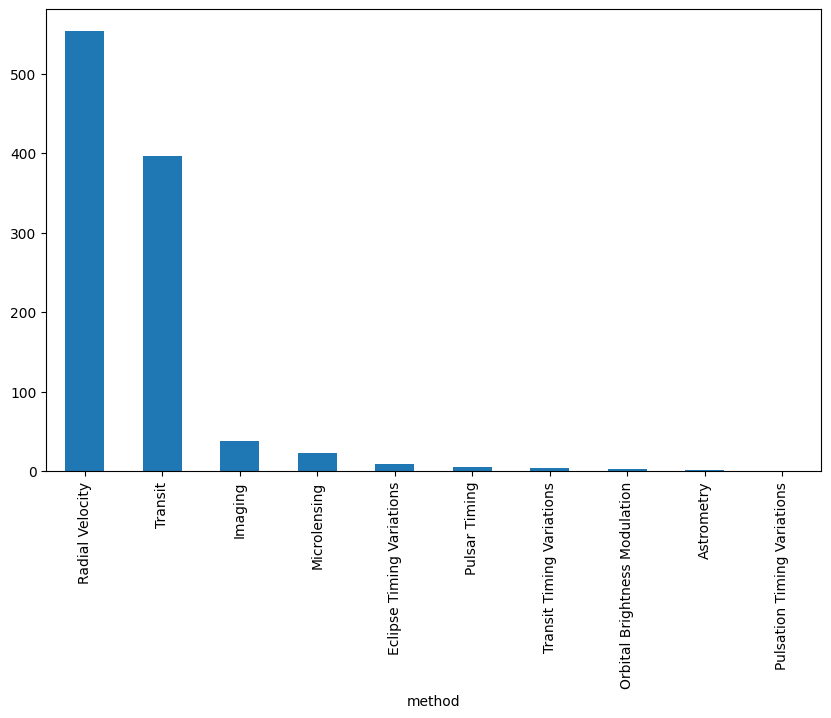

In [14]:
plt.figure(figsize=(10,6))  # Cambia el tamaño de la figura (ancho, alto)
method_counts.plot(kind='bar',x='method',y='count') # Crear grafico de barras de recuento por metodo de observacion
plt.show() # Mostrar el grafico

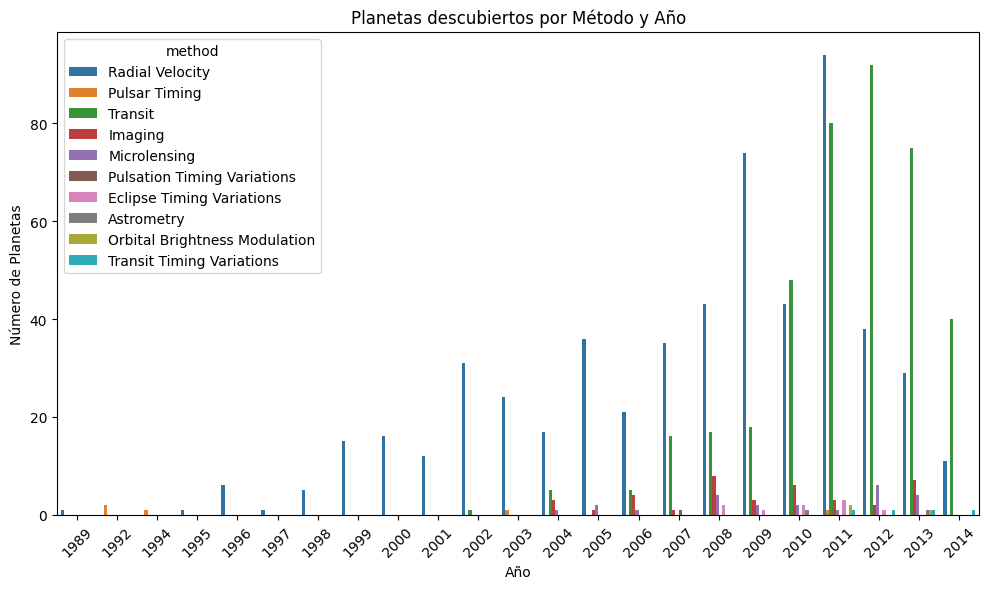

In [15]:
# Agrupar por metodo y año
planet_counts = df.groupby(['method', 'year'])['number'].count().reset_index()
planet_counts.describe

# Crear grafico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='number', hue='method', data=planet_counts)
plt.xlabel('Año')
plt.ylabel('Número de Planetas')
plt.title('Planetas descubiertos por Método y Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Outliers - datos atípicos

Se analizan las variables numéricas del conjunto de datos para obtener muestra una presencia significativa de valores atípicos. Una alta presencia de `outliers` puede sugerir la necesidad de revisar los datos de esa serie y decidir si deben ser tratados (eliminar o transformar) dependiendo de su relevancia para el análisis global.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


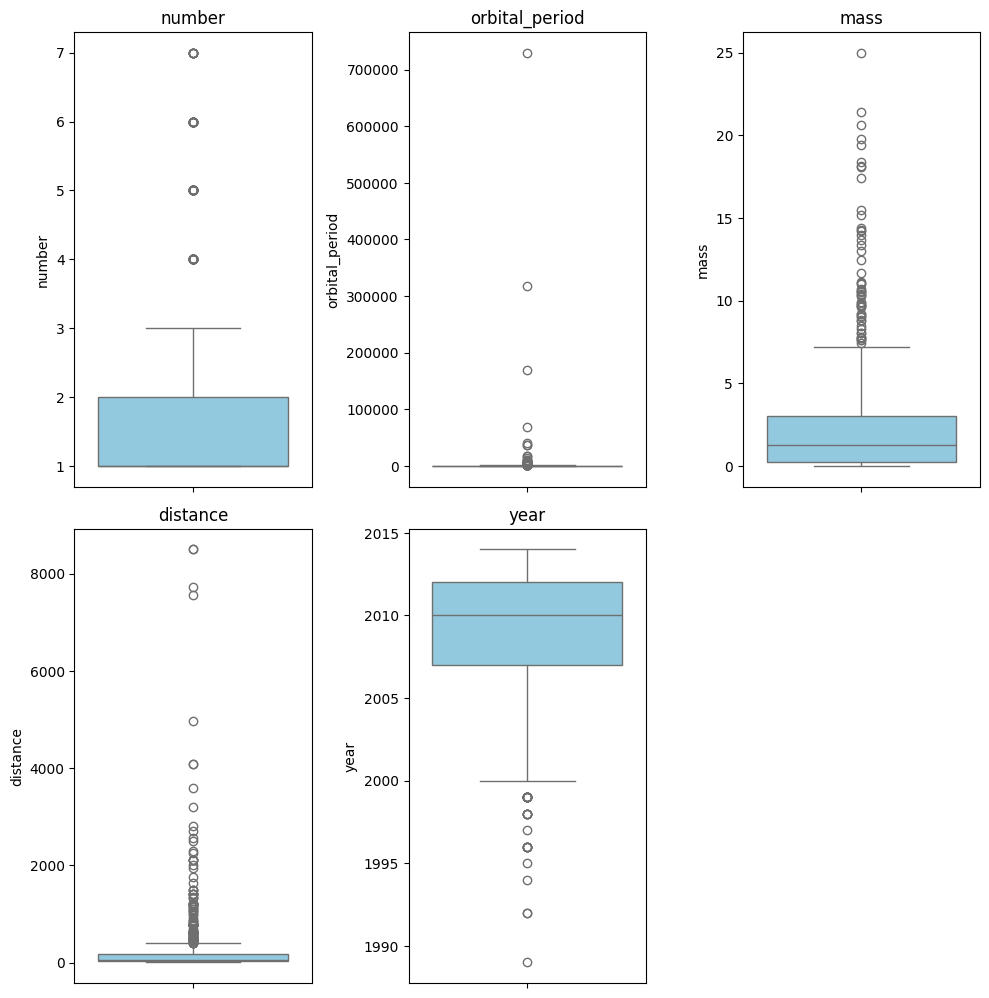

In [16]:
# Crear subdataframe con columnas numericas
numerical_cols = df.select_dtypes(include=np.number).columns

# Crear figura del grafico y ajustar tamaño
plt.figure(figsize=(10, 15))

# Recorrer las columnas y dibujar el subplot dentro de la figura
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  # Ajusta el tamaño de cada caja
    sns.boxplot(y=df[col], color='skyblue', orient='h')
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

*   `Number`: La mayoría de los valores se encuentran entre 1 y 2. Hay algunos valores atípicos fuera de este rango que llegan hasta 7.

*   `Orbital_period`: Los datos tienen una gran cantidad de valores atípicos, con algunos períodos orbitales extremadamente altos.

*   `Mass`: La mayoría de los datos de masa (comparado con Júpiter) están entre 0 y 5, pero hay varios valores que superan esta cifra y llegan hasta alrededor de 25, lo que indica la presencia de objetos con masas significativamente superiores a la media y que pueden desvirtuar mucho el análisis.

*   `Distance`: La mayoría de los valores de distancia están por debajo de 1000, pero existen algunos valores muy altos (cerca de 8000), algo que también puede desvirtuar el conjunto.

*   `Year`: La mayoría de las observaciones están entre 2000 y 2015. Este valor es esperable por la tecnología usada y las mejoras técnicas, además del aumento de programas de busqueda con el paso de los años.

### Análisis de dimensionalidad

https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales

Varianza explicada por cada componente: [0.31376637 0.23031111]
Cargas de los componentes principales:
       number  orbital_period      mass  distance      year
PC1 -0.562693        0.210991  0.586698  0.541205 -0.041744
PC2  0.133786       -0.024354 -0.216610  0.449429  0.855922


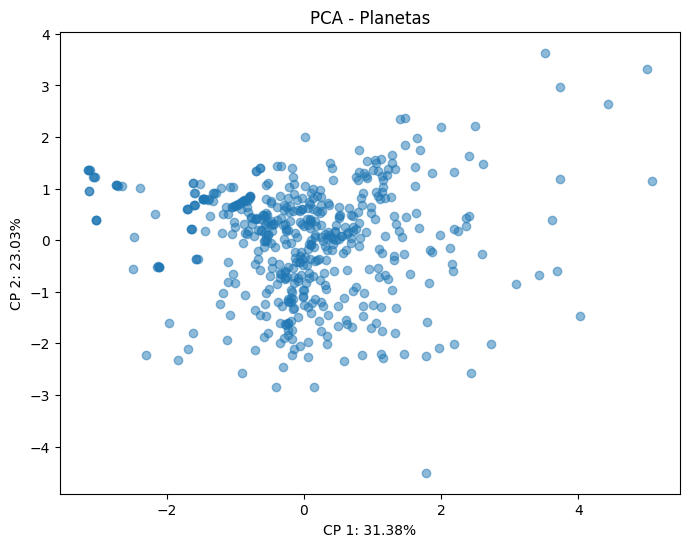

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


planets = df

# Filtrar datos numéricos para PCA y eliminar nulos
planets_numeric = planets[['number', 'orbital_period', 'mass', 'distance', 'year']].dropna()
planets_methods = planets['method'].iloc[planets_numeric.index]  # Filtrar métodos correspondientes

# Imputar valores faltantes (por ejemplo, con la media)
imputer = SimpleImputer(strategy='mean')
planets_imputed = imputer.fit_transform(planets_numeric)

# Estandarizar los datos (normalizar a media 0 y desviación estándar 1)
scaler = StandardScaler()
planets_scaled = scaler.fit_transform(planets_imputed)

# Crear el modelo PCA
pca = PCA(n_components=2)  # Puedes ajustar el número de componentes a tu necesidad
pca_result = pca.fit_transform(planets_scaled)

# Ver los componentes principales
pca_components = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Ver la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente: {explained_variance}")


# Crear un DataFrame para las cargas de los componentes principales
components_df = pd.DataFrame(pca.components_, columns=planets_numeric.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Imprimir la tabla con las cargas de las características
print("Cargas de los componentes principales:")
print(components_df)

# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('CP 1: ' + str(round(explained_variance[0]*100, 2)) + '%')
plt.ylabel('CP 2: ' + str(round(explained_variance[1]*100, 2)) + '%')
plt.title('PCA - Planetas')

plt.show()
